In [1]:
# Data preprocessing 
import csv
from pymongo import MongoClient 

In [32]:
class User:
    def __init__(self):
        self.client = MongoClient('mongodb://localhost:27017/')
        self.db = self.client['UserDatabase']
        self.collection = self.db['UserExpenses']

    def export_to_csv(self, file_name):
        data = self.collection.find()
        with open(file_name, 'w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Age', 'Gender', 'Total Income', 'Utilities', 'Entertainment', 'School Fees', 'Shopping', 'Healthcare'])
            for record in data:
                writer.writerow([
                    record['age'],
                    record['gender'],
                    record['totalIncome'],
                    record['expenses']['utilities'],
                    record['expenses']['entertainment'],
                    record['expenses']['school_fees'],
                    record['expenses']['shopping'],
                    record['expenses']['healthcare']
                ])

# Usage
if __name__ == "__main__":
    user = User()
    user.export_to_csv('user_data.csv')

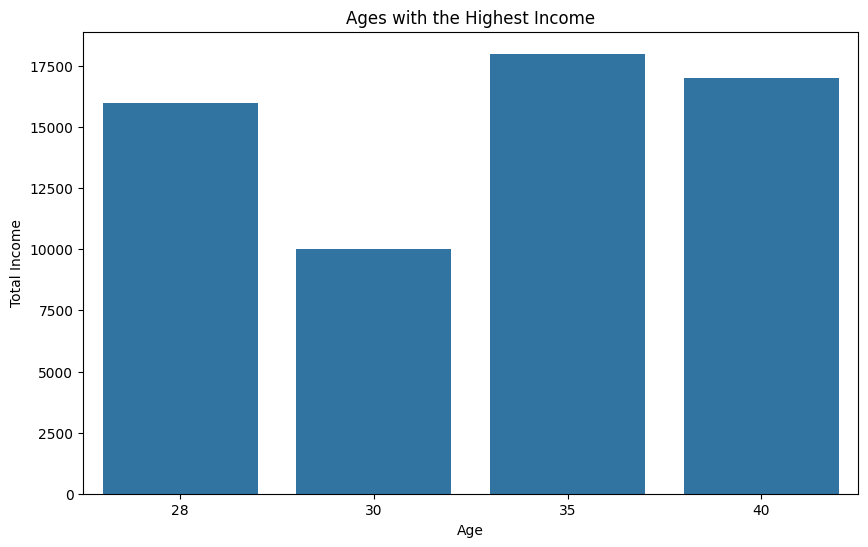

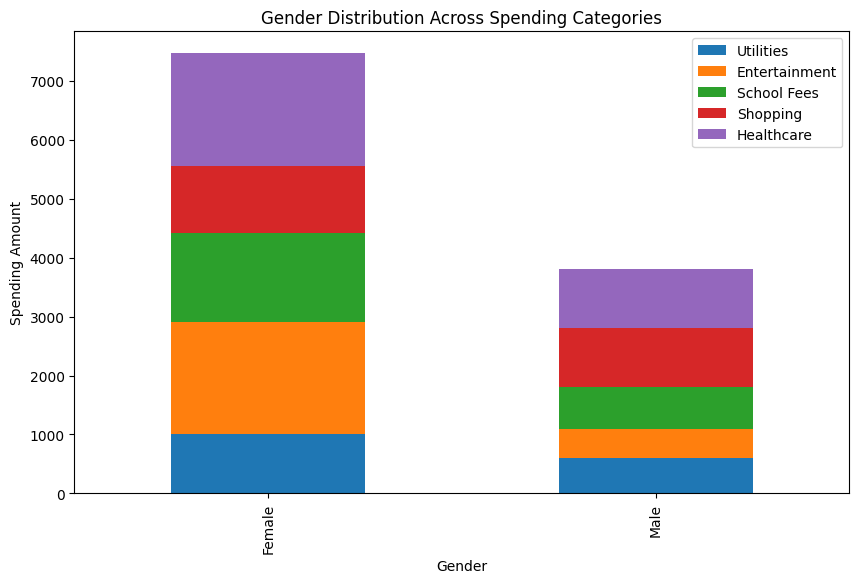

In [34]:
# Jupyter Notebook for visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
data = pd.read_csv('user_data.csv')

# Visualization: Ages with highest income
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Total Income', data=data)
plt.title('Ages with the Highest Income')
plt.savefig('age_income_chart.png')
plt.show()

# Visualization: Gender distribution across spending categories
expense_categories = ['Utilities', 'Entertainment', 'School Fees', 'Shopping', 'Healthcare']
gender_data = data.groupby('Gender')[expense_categories].sum()

gender_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution Across Spending Categories')
plt.ylabel('Spending Amount')
plt.savefig('gender_spending_chart.png')
plt.show()

In [9]:
pip install python_pptx

  Using cached python_pptx-1.0.2-py3-none-any.whl.metadata (2.5 kB)
  Using cached XlsxWriter-3.2.0-py3-none-any.whl.metadata (2.6 kB)
Using cached python_pptx-1.0.2-py3-none-any.whl (472 kB)
Using cached XlsxWriter-3.2.0-py3-none-any.whl (159 kB)
Note: you may need to restart the kernel to use updated packages.


In [37]:
from pptx import Presentation
from pptx.util import Inches

In [49]:
# Create a new presentation
ppt = Presentation()

# Slide 1: Add Title Slide
slide_1 = ppt.slides.add_slide(ppt.slide_layouts[0])
slide_1.shapes.title.text = "Client Presentation"
slide_1.placeholders[1].text = "Visualizing User Data"

# Slide 2: Add Bar Chart
slide_2 = ppt.slides.add_slide(ppt.slide_layouts[5])  # Blank slide
title = slide_2.shapes.title
title.text = "Ages with the Highest Income"
img_path = "age_income_chart.png"  # Path to saved chart
left = top = Inches(1)
slide_2.shapes.add_picture(img_path, left, top, width=Inches(5), height=Inches(3))

# Slide 3: Add Pie Chart
slide_3 = ppt.slides.add_slide(ppt.slide_layouts[5])  # Blank slide
title = slide_3.shapes.title
title.text = "Gender Distribution Across Spending Categories"
img_path = "gender_spending_chart.png"  # Path to saved chart
left = top = Inches(1)
slide_3.shapes.add_picture(img_path, left, top, width=Inches(5), height=Inches(3))

# Save the presentation
ppt.save("Client_Presentation.pptx")
print("Presentation saved!")

Presentation saved!
